# Online Gaming Behavior EDA:
## Descriptive and Inferntial Analyses

dataset: [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

____

In terms of this analysis I do not care about PlayerID or InGamePurchases. Also, since theses are all varying games, PlayerLevel is very ambiguous and so is AchievementsUnlocks. One game could only have 10 achievements. A percentage value here would be more descriptive. Same goes for PlayerLevel. What does that mean in terms of any game. Level 100 might be max, where level 50 could max in another game. We will drop these values for all analyses moving forward, including the ML portioned Notebook.

____

## Descriptive Analysis Questions
### Do Males or Females have a higher Engagement Level?
### How does engagement level break up vs. Play Time Hours?
### Do Males or Females have a higher average played time?
### What are the most played game genres based off this dataset?
### How are the age brackets (15-24, 25-34, 35-44, 45+) represented across Male and Females?
### What are the typical difficulty levels for games played, and which is played the most?
### Which of those difficulty levels are played the most (Play Time Hours)?

____

## Inferential Analysis Questions
### Is there any significant difference in the types of difficulty games Males play vs. Women?
### Is there a link between Game Genre and Engagement Level?
### Does age impact time played?

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics as stat

Read in the CSV file and look at the overall info of the dataset.

In [56]:
df = pd.read_csv('data/online_gaming_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

No apparentl null values from above, but there might be some unknown 'nulls'

Let's get an idea of our range of numerical values

In [57]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [58]:
df.head(4)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium


In [59]:
df = df.drop(['PlayerID', 'InGamePurchases', 'PlayerLevel', 'AchievementsUnlocked'], axis=1)

In [60]:
df

,Age,Gender,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium
1,29,Female,USA,Strategy,5.525961,Medium,5,144,Medium
2,22,Female,USA,Sports,8.223755,Easy,16,142,High
3,35,Male,USA,Action,5.265351,Easy,9,85,Medium
4,33,Male,Europe,Action,15.531945,Medium,2,131,Medium
...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,Easy,4,75,Medium
40030,44,Female,Other,Simulation,13.539280,Hard,19,114,High
40031,15,Female,USA,RPG,0.240057,Easy,10,176,High
40032,34,Male,USA,Sports,14.017818,Medium,3,128,Medium


In [61]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

This is a petpeeve, but Male/Female is not a Gender classification, so we will rename this to sex.

In [62]:
df = df.rename(columns={'Gender': 'Sex'})


In [63]:
df.Sex.value_counts()

Male      23959
Female    16075
Name: Sex, dtype: int64

In [64]:
df.Location.unique()
# Looks like 4 regions total
df.Location.value_counts()

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64

In [65]:
df.GameGenre.unique()
# And we have 5 genre groups
df.GameGenre.value_counts()

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64

Let's look at our target column for our future exploration

In [66]:
df.EngagementLevel.unique()

array(['Medium', 'High', 'Low'], dtype=object)

Okay, so only 3 groups to worry about here. We will probably look at encoding this later on for predictions

In [67]:
sorted_unique = sorted(df.Age.unique())

# Reindex the value_counts() to match the sorted order
value_counts_sorted = df.Age.value_counts().reindex(sorted_unique, fill_value=0)

value_counts_sorted

15    1101
16    1138
17    1149
18    1167
19    1139
20    1113
21    1128
22    1150
23    1130
24    1153
25    1108
26    1107
27    1217
28    1108
29    1187
30    1150
31    1228
32    1163
33    1123
34    1103
35    1151
36    1154
37    1219
38    1140
39    1128
40    1202
41    1111
42    1187
43    1180
44    1166
45    1108
46    1121
47    1102
48    1097
49    1106
Name: Age, dtype: int64

Looks like the ages represented are from 15 to 49, with a pretty even spread throughout. That's pretty good sampling. 

In [68]:
# Let's get our headers again for descriptive analysis
df.head(1)

,Age,Sex,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium


### Do males or females have a higher engagement level?

<AxesSubplot:xlabel='EngagementLevel', ylabel='Count'>

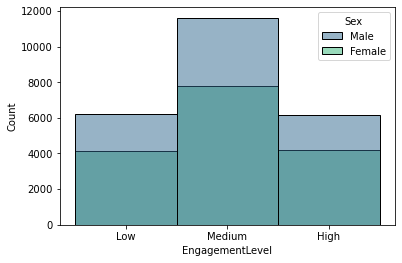

In [107]:
list_order = ['Low', 'Medium', 'High']

df_engaged = df['EngagementLevel'] = pd.Categorical(df['EngagementLevel'], categories=list_order, ordered=True)

sns.histplot(data=df, x='EngagementLevel', hue='Sex', palette='viridis')

It looks like a medium engagement level is more common among both males and females.

### How does engagement level break up to time played hours?

In [70]:
df_low = df[df['EngagementLevel'] == 'Low']
df_medium = df[df['EngagementLevel'] == 'Medium']
df_high = df[df['EngagementLevel'] == 'High']

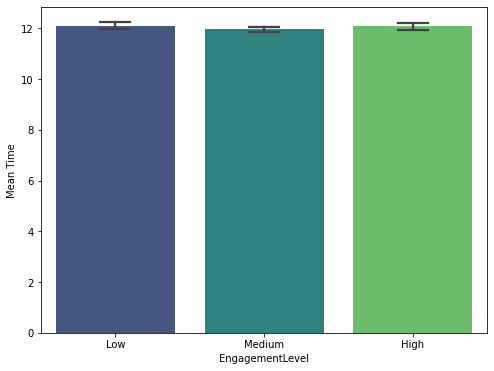

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df, x='EngagementLevel', y='PlayTimeHours', capsize=0.2, ax=ax, hue='EngagementLevel', palette='viridis')

ax.set(ylabel='Mean Time')
plt.show()

The times are pretty similar across the different engagement levels, which seems a bit odd. Unless play time doesn't have a huge impact on engagement level.

### Do Males or Females have a higher average played time?

<AxesSubplot:xlabel='Sex', ylabel='PlayTimeHours'>

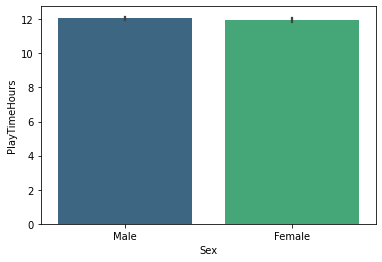

In [103]:
sns.barplot(data=df, x='Sex', y='PlayTimeHours', hue='Sex', palette='viridis')

### What are the most played game genres based off this dataset?


<AxesSubplot:xlabel='GameGenre', ylabel='PlayTimeHours'>

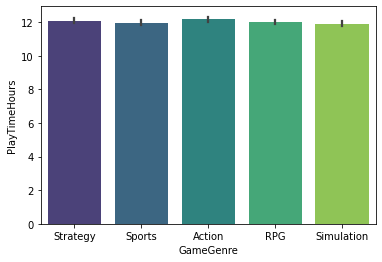

In [102]:
sns.barplot(data=df, x='GameGenre', y='PlayTimeHours', hue='GameGenre', palette='viridis')

### What are the typical game genres played, and which is played the most?

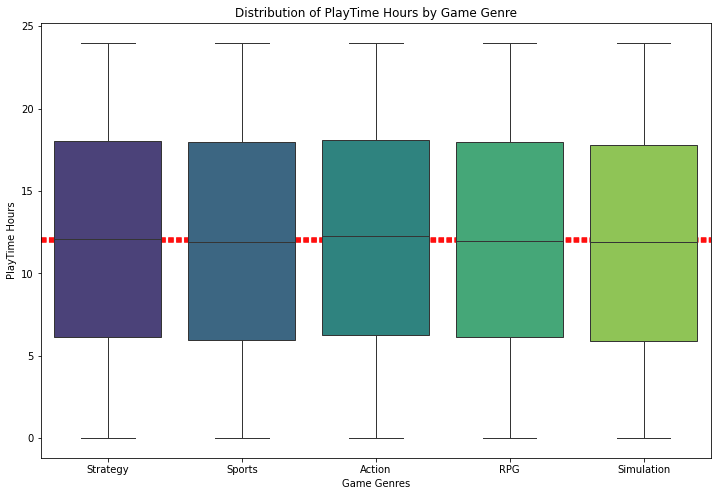

In [101]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='PlayTimeHours', data=df, hue='GameGenre', palette='viridis')

# Calculate and plot the means for each genre
means = df.groupby('GameGenre')['PlayTimeHours'].mean()
for i, mean in enumerate(means):
    plt.axhline(mean, color='red', linestyle='--', label=f'Mean for {means.index[i]}' if i == 0 else "")

# Set labels and title
plt.xlabel('Game Genres')
plt.ylabel('PlayTime Hours')
plt.title('Distribution of PlayTime Hours by Game Genre')


# Show the plot
plt.show()

It seems like, again, the data is pretty well distributed. Action games squeeze by with having a great mean of hours played.

### How are the age brackets (15-24, 25-34, 35-44, 45+) represented across Male and Females?


In [75]:
df['AgeCategory'] = pd.cut(df['Age'], [15, 24, 34, 44, 49], labels=['15-24', '25-34', '35-44', '45+'], include_lowest=True)

In [76]:
df

,Age,Sex,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,EngagementLevel,AgeCategory
0,43,Male,Other,Strategy,16.271119,Medium,6,108,Medium,35-44
1,29,Female,USA,Strategy,5.525961,Medium,5,144,Medium,25-34
2,22,Female,USA,Sports,8.223755,Easy,16,142,High,15-24
3,35,Male,USA,Action,5.265351,Easy,9,85,Medium,35-44
4,33,Male,Europe,Action,15.531945,Medium,2,131,Medium,25-34
...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,Easy,4,75,Medium,25-34
40030,44,Female,Other,Simulation,13.539280,Hard,19,114,High,35-44
40031,15,Female,USA,RPG,0.240057,Easy,10,176,High,15-24
40032,34,Male,USA,Sports,14.017818,Medium,3,128,Medium,25-34


In [77]:
df.AgeCategory.value_counts()

35-44    11638
25-34    11494
15-24    11368
45+       5534
Name: AgeCategory, dtype: int64

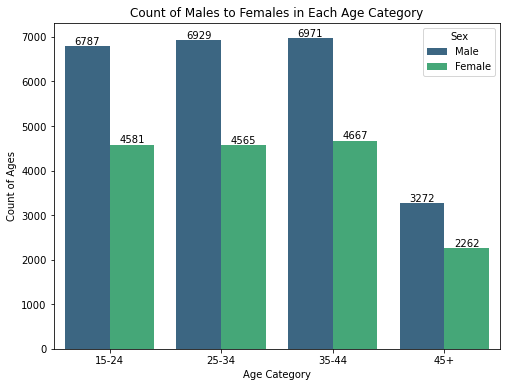

In [100]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x='AgeCategory', hue='Sex', palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count of Ages')
ax.set_xlabel('Age Category')
ax.set_title('Count of Males to Females in Each Age Category')

# Show the plot
plt.show()



This data really found a solid make up of age groups for 15-44. It does sort of make sense that 45+ is the smallest category, though it might have a closer ratio of male to female

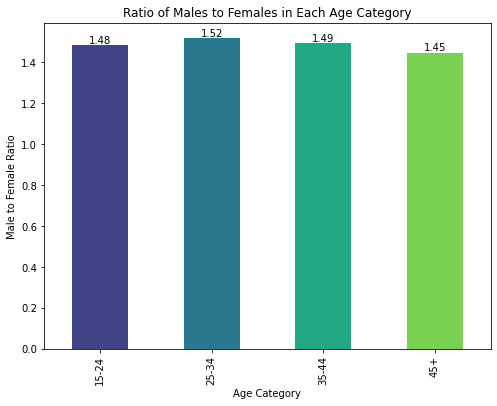

In [108]:
# Count the number of males and females in each age category
counts = df.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Calculate the ratio of males to females
counts['Ratio'] = counts['Male'] / counts['Female']

# Get the color palette from Seaborn
palette = sns.color_palette('viridis', len(df.AgeCategory.unique()))

# Plot the ratios
plt.figure(figsize=(8, 6))
ax = counts['Ratio'].plot(kind='bar', color=palette)

# Annotate the bars with the ratio values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set labels and title
ax.set_ylabel('Male to Female Ratio')
ax.set_xlabel('Age Category')
ax.set_title('Ratio of Males to Females in Each Age Category')

# Show the plot
plt.show()

I guess the 25-34 age range had the best ratio

### What are the typical difficulty levels for games played, and which is played the most?


In [81]:
df.GameDifficulty.unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

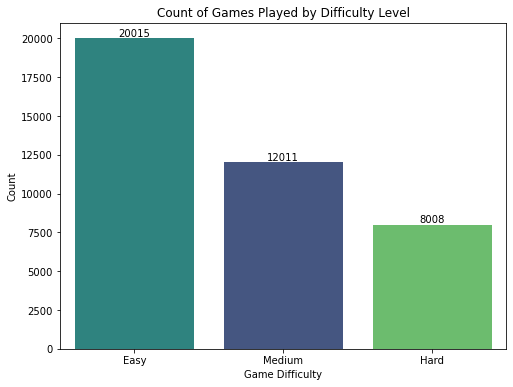

In [93]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='GameDifficulty', data=df, order=['Easy', 'Medium', 'Hard'], hue='GameDifficulty', palette='viridis')

# Add labels and title
plt.xlabel('Game Difficulty')
plt.ylabel('Count')
plt.title('Count of Games Played by Difficulty Level')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

### Which of those difficulty levels are played the most (Play Time Hours)?

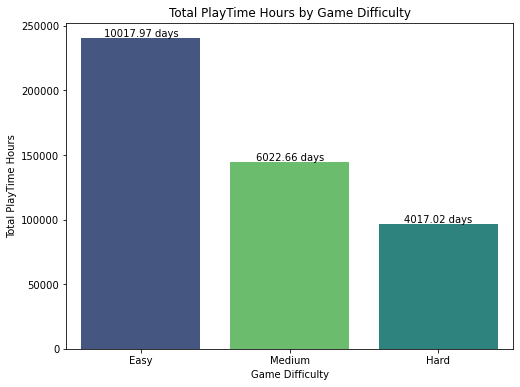

In [96]:
# Calculate total playtime for each difficulty level
total_playtime = df.groupby('GameDifficulty')['PlayTimeHours'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='GameDifficulty', y='PlayTimeHours', data=total_playtime, order=['Easy', 'Medium', 'Hard'], hue='GameDifficulty', palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{height / 24:.2f} days', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add labels and title
plt.xlabel('Game Difficulty')
plt.ylabel('Total PlayTime Hours')
plt.title('Total PlayTime Hours by Game Difficulty')

# Show the plot
plt.show()

____

## Inferential Analysis

### Is there any significant difference in the types of difficulty games Males play vs. Women?


### Is there a link between Game Genre and Engagement Level?


### Does age impact time played?